# The final project           
## ISE 364                                                                          
## Dr. Plebani 
## Team: 
## Mohanad Khazaali & Fahim Rustamy
## Tuesday 12/18/2018
****** Problem statement **********

Find the best classification technique that predicts of whether a client will subscribe to a long-term deposit program or not. 

We have different supervised motheds (output known) that can be used:

* a) The logistic regression
* b) KNearestNeighbors (KNN)
* c) Random forest
* d) SVM
* e) Neural Network using Keras

In [1]:
# Import all the useful libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing                     # for numeric values finding 
from sklearn.linear_model import LogisticRegression   # use for logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow
import pickle                     # use with Keras
%matplotlib inline
sns.set_style("darkgrid")        # the background of the plot

C:\Users\Mohanad\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Read the given data:
data = pd.read_csv("data.csv")    # predict the best model

## Understand the data and their features 
* head
* describe
* info

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no


* All the input variables are described in the description of the project
* We need to know the output variable (desired target), has the client subscribed? (binary: "yes", "No")

In [4]:
data.describe()

,age,campaign,pdays,cons_price_idx,cons_conf_idx,prime_rate
count,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000
mean,40.009731,2.573405,964.353923,93.578309,-40.506769,3.638561
std,10.360507,2.774774,182.216275,0.577601,4.610277,1.727104
min,17.000000,1.000000,0.000000,92.201000,-50.800000,0.634000
25%,32.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.000000,2.000000,999.000000,93.798000,-41.800000,4.857000
75%,47.000000,3.000000,999.000000,93.994000,-36.400000,4.961000
max,98.000000,56.000000,999.000000,94.767000,-26.900000,5.045000


In [5]:
data.info()    # we do not have any missing data!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181 entries, 0 to 40180
Data columns (total 16 columns):
age               40181 non-null int64
job               40181 non-null object
marital           40181 non-null object
education         40181 non-null object
default           40181 non-null object
housing           40181 non-null object
loan              40181 non-null object
contact           40181 non-null object
day_of_week       40181 non-null object
campaign          40181 non-null int64
pdays             40181 non-null int64
poutcome          40181 non-null object
cons_price_idx    40181 non-null float64
cons_conf_idx     40181 non-null float64
prime_rate        40181 non-null float64
y                 40181 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 4.9+ MB


In [6]:
data.isnull().sum()  # we do not have any missing data!

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
day_of_week       0
campaign          0
pdays             0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
prime_rate        0
y                 0
dtype: int64

In [7]:
# lets take a look to the education catagories 
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [8]:
data['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 24, 21, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

**We will group ('basic.4y', 'basic.6y', 'basic.9y') together with one word 'basic' for a better modelling**

In [9]:
data.replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic', inplace=True)

In [10]:
# lets test it again
data['education'].unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [11]:
data['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

## Data exploration and visualizition

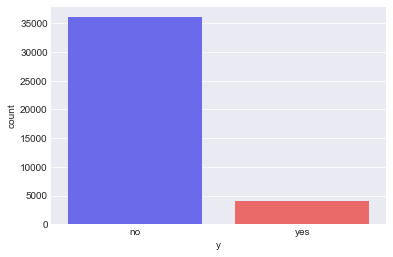

In [12]:
# find the data output feature 
sns.countplot(x='y',data=data, palette="seismic") # it can be used any color from the colormap with palette="deep"

In [13]:
data['y'].value_counts()

no     36065
yes     4116
Name: y, dtype: int64

**It can be seen from the above plot, we do have imbalance data classes**

**Lets calculate the percentage of each one ('yes' or 'no')**

In [14]:
Client_no_sub=len(data[data['y']=='no'])
Client_sub=len(data[data['y']=='yes'])
Total=Client_no_sub+Client_sub
percen_no_sub=Client_no_sub/Total*100
percen_sub=Client_sub/Total*100
print('The percentage of the client has NOT subscribed is:',percen_no_sub)
print('The percentage of the client has subscribed is:',percen_sub)

The percentage of the client has NOT subscribed is: 89.75635250491526
The percentage of the client has subscribed is: 10.243647495084742


**It obvious from the percentages that we need to balance our data!**

In [15]:
# find the mean of the data according to y
data.groupby('y').mean()

,age,campaign,pdays,cons_price_idx,cons_conf_idx,prime_rate
y,,,,,,
no,39.916124,2.632968,984.079800,93.604335,-40.593978,3.812245
yes,40.829932,2.051506,791.512877,93.350263,-39.742638,2.116718


* **We need further visualization to get better understanding of our data**
* **For example,the age result above is telling us that the average age of the client who bought the long term deposit is higher than the one who did not buy it! (still not give a good picture about the data)** 

## Note:
**Lets take a look to the features to understand which feature is important compare to other** 

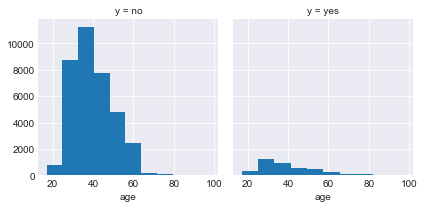

In [16]:
# age feature
g = sns.FacetGrid(data, col="y")
g = g.map(plt.hist, "age")

C:\Users\Mohanad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'age representation')

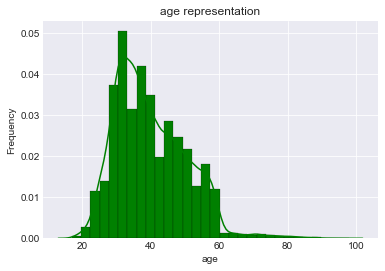

In [17]:
sns.distplot(data['age'],kde=True, bins=30,color='g',hist_kws=dict(edgecolor='k', linewidth=.2, alpha=1)); 
plt.ylabel('Frequency')
plt.title('age representation')

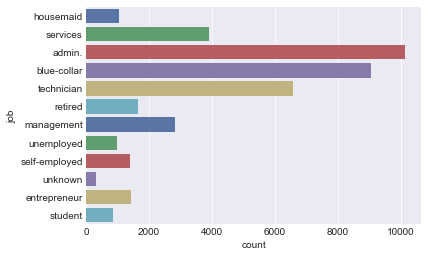

In [18]:
# Job feature (undestand number of participants in the subscription)
sns.countplot(y='job', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

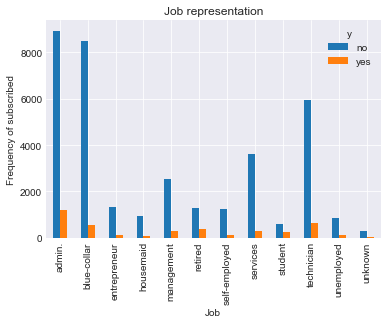

In [19]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Job representation')
plt.xlabel('Job')
plt.ylabel('Frequency of subscribed')

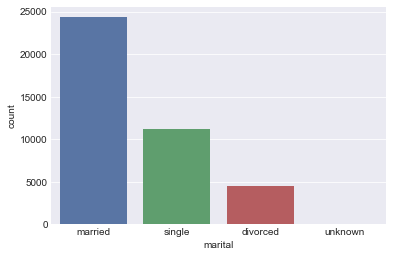

In [20]:
# Marital feature (undestand number of participants in the subscription)
sns.countplot(x='marital', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

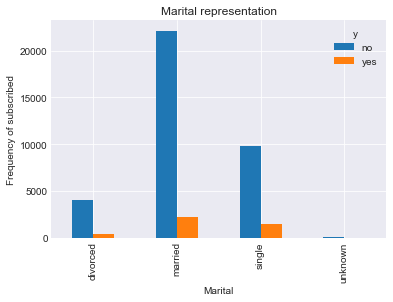

In [21]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
pd.crosstab(data.marital,data.y).plot(kind='bar')
plt.title('Marital representation')
plt.xlabel('Marital')
plt.ylabel('Frequency of subscribed')

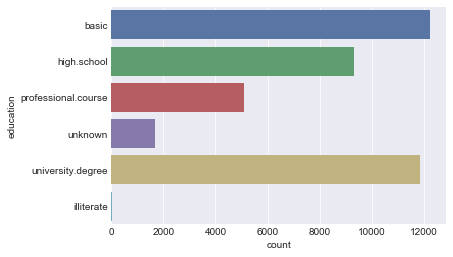

In [22]:
# Education feature (understand number of participants in the subscription)
sns.countplot(y='education', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

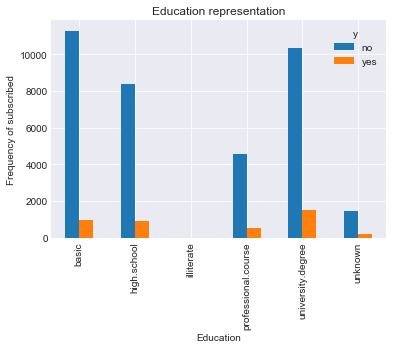

In [23]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)[source]
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Education representation')
plt.xlabel('Education')
plt.ylabel('Frequency of subscribed')

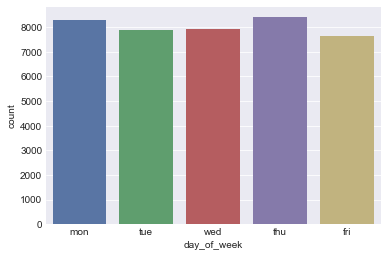

In [24]:
# day_of_week feature (undestand number of participants in the subscription)
sns.countplot(x='day_of_week', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

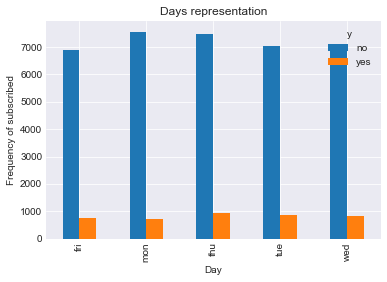

In [25]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)[source]
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Days representation')
plt.xlabel('Day')
plt.ylabel('Frequency of subscribed')

**It can be seen that the day of the week is does not matter** 

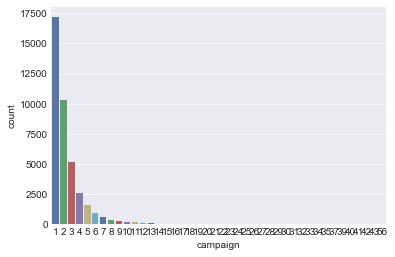

In [26]:
# campaign feature (undestand number of participants in the subscription)
sns.countplot(x='campaign', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

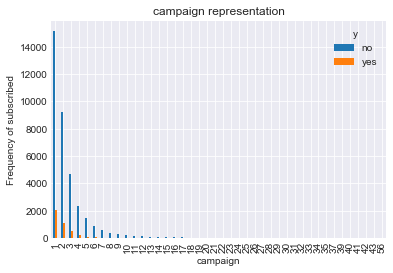

In [27]:
pd.crosstab(data.campaign,data.y).plot(kind='bar')
plt.title('campaign representation')
plt.xlabel('campaign')
plt.ylabel('Frequency of subscribed')

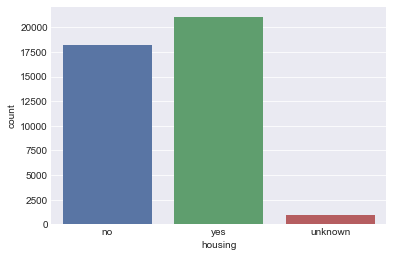

In [28]:
# housing feature (undestand number of participants in the subscription)
sns.countplot(x='housing', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

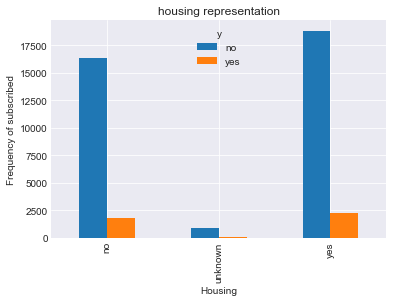

In [29]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)[source]
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('housing representation')
plt.xlabel('Housing')
plt.ylabel('Frequency of subscribed')

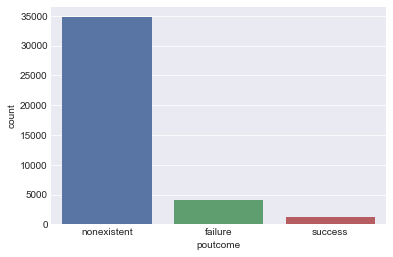

In [30]:
# Poutcome: outcome of the previous marketing campaign 
# Poutcome feature (undestand number of participants in the subscription)
sns.countplot(x='poutcome', data=data, palette="deep")


Text(0,0.5,'Frequency of subscribed')

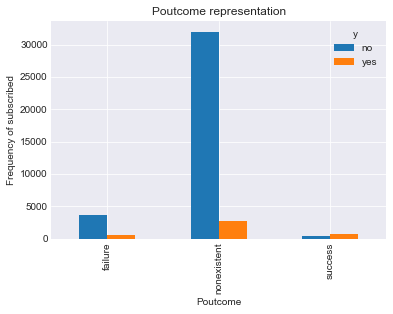

In [31]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Poutcome representation')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of subscribed')

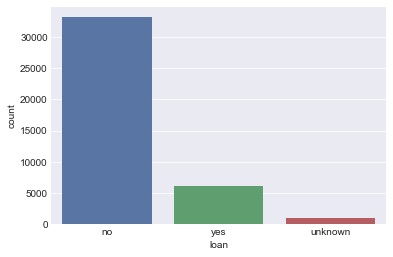

In [32]:
# loan feature (undestand number of participants in the subscription)
sns.countplot(x='loan', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

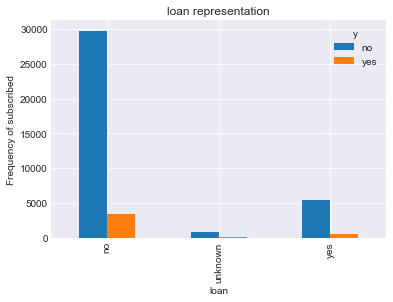

In [33]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
pd.crosstab(data.loan,data.y).plot(kind='bar')
plt.title('loan representation')
plt.xlabel('loan')
plt.ylabel('Frequency of subscribed')

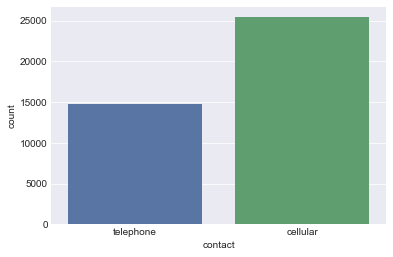

In [34]:
# contact feature (undestand number of participants in the subscription)
sns.countplot(x='contact', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

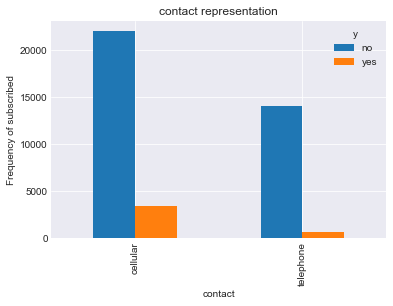

In [35]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
pd.crosstab(data.contact,data.y).plot(kind='bar')
plt.title('contact representation')
plt.xlabel('contact')
plt.ylabel('Frequency of subscribed')

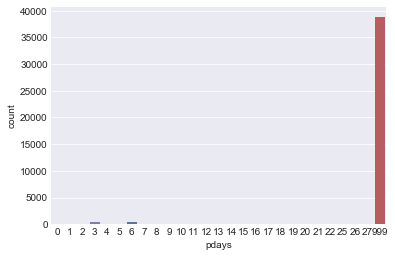

In [36]:
# contact feature (undestand number of participants in the subscription)
sns.countplot(x='pdays', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

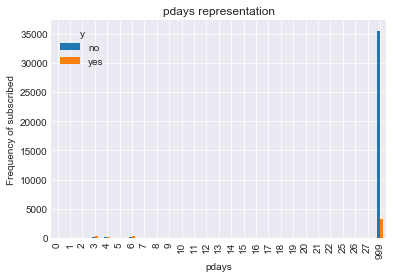

In [37]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
pd.crosstab(data.pdays,data.y).plot(kind='bar')
plt.title('pdays representation')
plt.xlabel('pdays')
plt.ylabel('Frequency of subscribed')

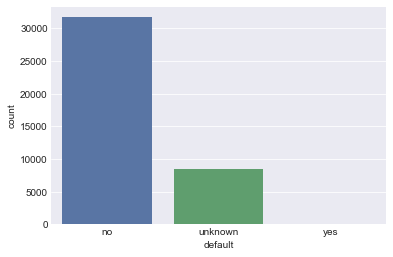

In [38]:
# default feature (undestand number of participants in the subscription)
sns.countplot(x='default', data=data, palette="deep")

Text(0,0.5,'Frequency of subscribed')

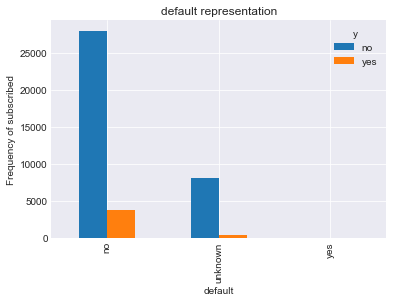

In [39]:
# pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.title('default representation')
plt.xlabel('default')
plt.ylabel('Frequency of subscribed')

## Other features:
***By looking at other features (i.e., day of week, and Pdays (most are 999)) will not affect our model significantly. So it can be neglected from the model (drop) (it can be included and see how will ghange the results)** 

###### Summary of the Visualizations:

* **1) The job feature has a great impact on our output (see the figure titled "Job representation")**
* **2) The marital feature (i.e. married) has an impact on our output (see the figure titled "Marital representation"), but it is not significan**
* **3) The Education feature seems to have an obvious impact on our output (see the figure titled "Education representation") **
* **4) The day of the week feature seems to have a very weak impact on our output (see the figure titled "days representation") so it can be neglected**
* **5) The cotact feature seems to have an acceptable impact on our output (see the figure titled "contact representation")**
* **6) The housing, poutcome and loan features seem to have a good impact on our output, but with less weight compared to (1,2 and 3) (see the figures titled "housing representation, poutcome representation, and loan representation") **



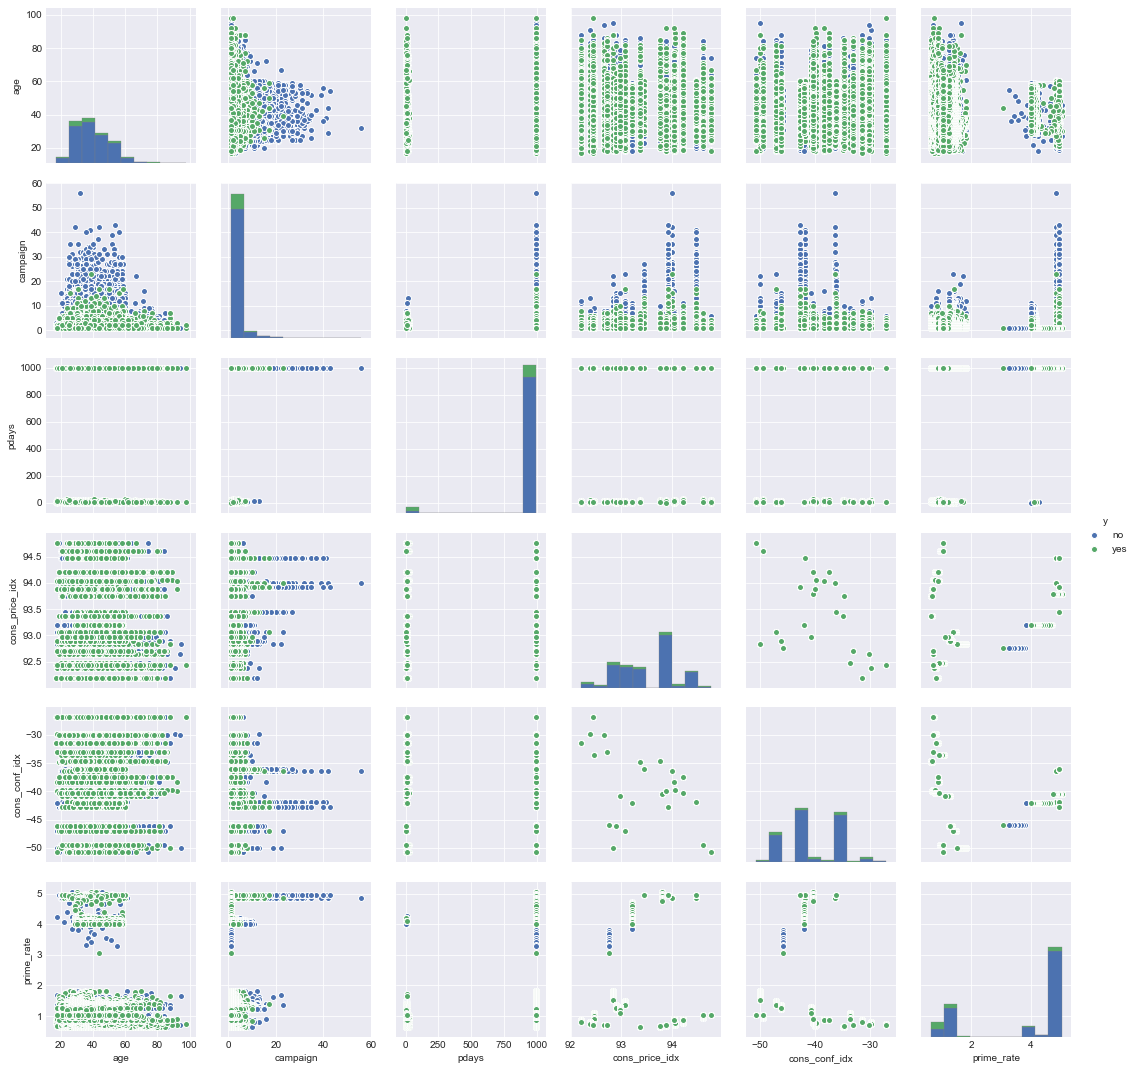

In [40]:
sns.pairplot(data,hue="y", palette='deep', diag_kws=dict(edgecolor='gray',linewidth=.3))

 *                                            **Visualization Summary**

## Pre-processing the data
* Lets eleminate the features that have less affect on the model (recall the visualization for which features are important)
* we will drop 2 features (pdays and day_of_week)

In [41]:
data.drop(['day_of_week','pdays'], axis=1, inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,56,housemaid,married,basic,no,no,no,telephone,1,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,1,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,1,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic,no,no,no,telephone,1,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,1,nonexistent,93.994,-36.4,4.857,no


**To predict a good result we need to make our data smooth and uniform**
* **Convert all the categorical features to numeric features (i.e the dummy variable (0,1) or the 
    most efficient technique "LabelEncoder")**
* class sklearn.preprocessing.LabelEncoder
* Encode labels with value between 0 and n_classes-1
* https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets

In [42]:
## call the LabelEncoder as le
le = preprocessing.LabelEncoder()

In [43]:
# fit and transform all the features to numeric order!
data.job = le.fit_transform(data.job)
data.marital = le.fit_transform(data.marital)
data.education = le.fit_transform(data.education)
data.default = le.fit_transform(data.default)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.poutcome = le.fit_transform(data.poutcome)
data.y = le.fit_transform(data.y)
#data.y = le.inverse_transform(data.y)       # to go back to the categorical case

In [44]:
data.head()

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,56,3,1,0,0,0,0,1,1,1,93.994,-36.4,4.857,0
1,57,7,1,1,1,0,0,1,1,1,93.994,-36.4,4.857,0
2,37,7,1,1,0,2,0,1,1,1,93.994,-36.4,4.857,0
3,40,0,1,0,0,0,0,1,1,1,93.994,-36.4,4.857,0
4,56,7,1,1,0,0,2,1,1,1,93.994,-36.4,4.857,0


**Visualize the new data**

In [45]:
data['job'].unique()   # we have 12 categorical job types

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8], dtype=int64)

In [46]:
data['marital'].unique()   # we have 4 categorical marital types

array([1, 2, 0, 3], dtype=int64)

In [47]:
data['education'].unique()   # we have 6 categorical education types

array([0, 1, 3, 5, 4, 2], dtype=int64)

In [48]:
data['default'].unique()   # we have 3 categorical default types

array([0, 1, 2], dtype=int64)

In [49]:
data['housing'].unique()   # we have 3 categorical housing types

array([0, 2, 1], dtype=int64)

In [50]:
data['loan'].unique()   # we have 3 categorical loan types

array([0, 2, 1], dtype=int64)

In [51]:
data['contact'].unique()   # we have 2 categorical contact types

array([1, 0], dtype=int64)

In [52]:
data['poutcome'].unique()   # we have 3 categorical poutcome types

array([1, 0, 2], dtype=int64)

In [53]:
# The output
data['y'].unique()   # we have 2 categorical output types

array([0, 1], dtype=int64)

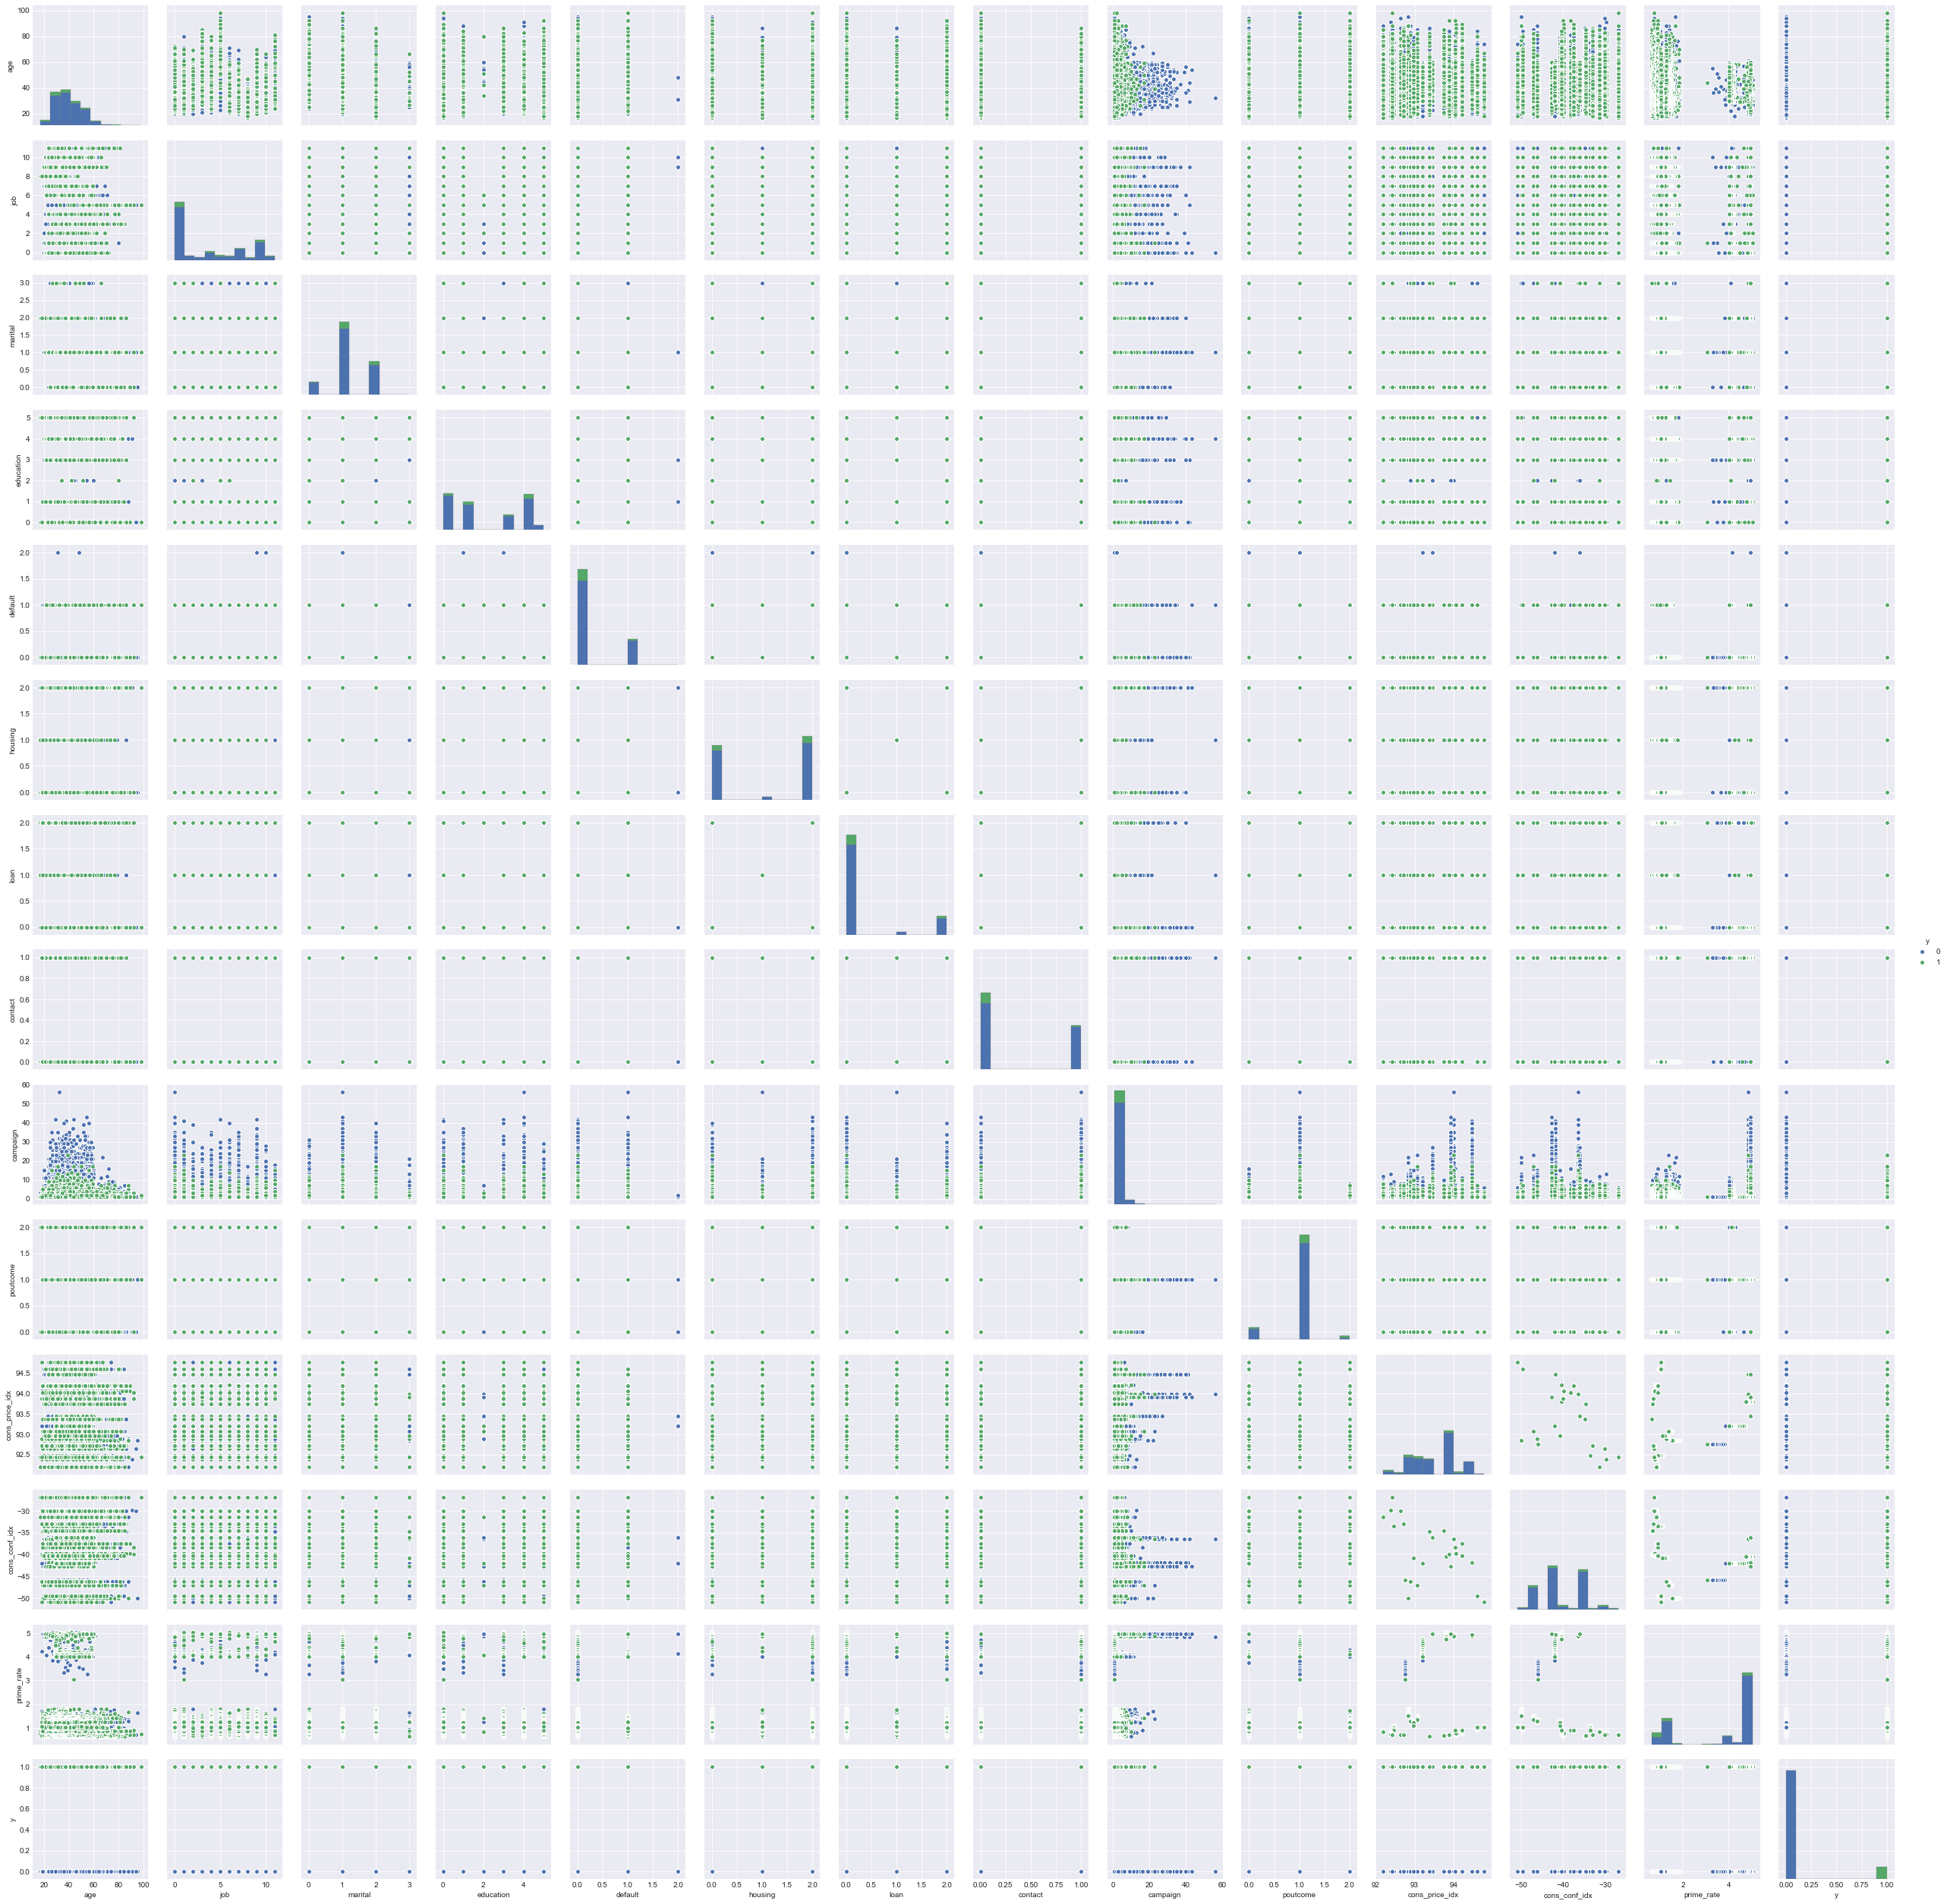

In [54]:
sns.pairplot(data,hue="y", palette='deep', diag_kws=dict(edgecolor='gray',linewidth=.3))

Text(0.5,1,'data.corr()')

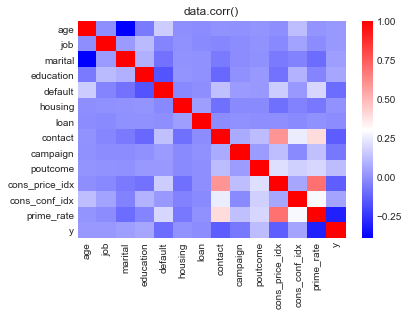

In [55]:
# Matrix form for correlation data
sns.heatmap(data.corr(),cmap='bwr',annot=False) #annot = true we get the number inside 
plt.title('data.corr()')

## Eleminate the imbalance in the data
**Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. As we we saw previously with the client responses:**
* **Clients response with approximately 90% of "no"and 10% of "yes"**

**Lets perfom the prediction with the logistic regression on our current data. It is expected to have a high accuracy since we have imblance data**

In [56]:
# test
from sklearn.metrics import accuracy_score
y_train=data.y
X_train=data.drop('y', axis=1)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_train)
print(accuracy_score(predictions, y_train))

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9051292899629177


**Is it a good accuracy?**
* Since we have imbalance data, its expected the majority of prediction to be only one class ('no')

**There are several ways to balance the data (Resampling):**
* Oversample the data (just increase the "yes" sample)
* undersample the data (just decrease the "no" sample)
* Changing your performance metric by using, The Receiver Operating Characteristic (ROC)
* SMOTE (This object is an implementation of SMOTE - Synthetic Minority Over-sampling Technique), for more info:
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
* XG Boost
* For more information about imbalance:
* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

* **Find the representation of the confusion matrix before oversampling:**

Confusion matrix:
 [[35763   302]
 [ 3510   606]]


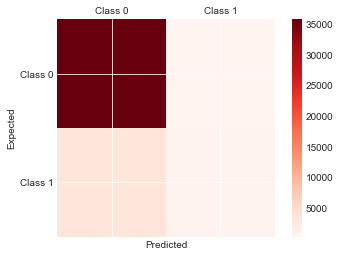

In [57]:
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_train, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Oversampling:
* **Upsample minority class**

In [58]:
from sklearn.utils import resample

In [59]:
# Separate majority and minority classes
data_majority = data[data.y==0]
data_minority = data[data.y==1]
 
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,             # sample with replacement
                                 n_samples=Client_no_sub,  # to match majority class
                                 random_state=123)         # reproducible results
 
# Combine results of the samples
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
data_upsampled.y.value_counts()

1    36065
0    36065
Name: y, dtype: int64

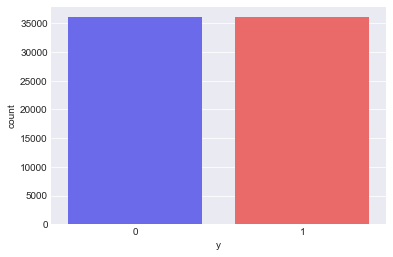

In [60]:
# find the data output feature 
sns.countplot(x='y',data=data_upsampled, palette="seismic") # it can be used any color from the colormap with palette="deep"

In [61]:
# test the new data
y_train=data_upsampled.y
X_train=data_upsampled.drop('y', axis=1)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_train)
print(accuracy_score(predictions, y_train))

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7272840704283932


In [62]:
predictions 

array([0, 0, 0, ..., 1, 0, 1])

Confusion matrix:
 [[27973  8092]
 [11579 24486]]


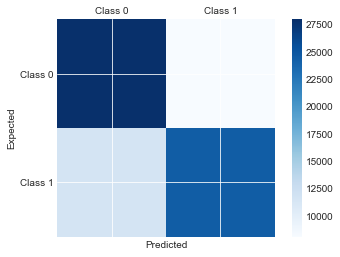

In [63]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_train, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**To have a higher diagonal values of the confusion matrix, the better indication can be acheived!**

In [64]:
data.head()

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,56,3,1,0,0,0,0,1,1,1,93.994,-36.4,4.857,0
1,57,7,1,1,1,0,0,1,1,1,93.994,-36.4,4.857,0
2,37,7,1,1,0,2,0,1,1,1,93.994,-36.4,4.857,0
3,40,0,1,0,0,0,0,1,1,1,93.994,-36.4,4.857,0
4,56,7,1,1,0,0,2,1,1,1,93.994,-36.4,4.857,0


In [65]:
# We can do undersampling by following the same procedure with oversampling, but lets perform SMOTE and see the behavior
# SMOTE Modeling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
y=data.y
X=data.drop('y', axis=1)
data_train_x, data_test_x, data_train_y, data_test_y=train_test_split(X,y,test_size=0.30,random_state=0)
columns=data_train_x.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'poutcome', 'cons_price_idx', 'cons_conf_idx',
       'prime_rate'],
      dtype='object')

In [66]:
# now we can use SMOTE to balance our data
sm_data_x,sm_data_y =sm.fit_sample(data_train_x,data_train_y)
sm_data_x=pd.DataFrame(data=sm_data_x, columns=columns)
sm_data_y=pd.DataFrame(data=sm_data_y, columns=['y'])

# we can now check our data
print('length of oversampled data is:',len(sm_data_x))
print('Number of no subscribed client within new data is:',len(sm_data_y[sm_data_y['y']==0]))
print('Number of subscribed client within new data is:',len(sm_data_y[sm_data_y['y']==1]))
print("Percentage of no subscription within new data is ",len(sm_data_y[sm_data_y['y']==0])/len(sm_data_x))
print("Percentage of subscription within new data is ",len(sm_data_y[sm_data_y['y']==1])/len(sm_data_x))

length of oversampled data is: 50504
Number of no subscribed client within new data is: 25252
Number of subscribed client within new data is: 25252
Percentage of no subscription within new data is  0.5
Percentage of subscription within new data is  0.5


**We can see that we have balance classes!**

In [67]:
logmodel = LogisticRegression()
logmodel.fit(sm_data_x,sm_data_y)
predictions = logmodel.predict(data_test_x)
print(accuracy_score(predictions, data_test_y))

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7723766072169225


Confusion matrix:
 [[8497 2316]
 [ 428  814]]


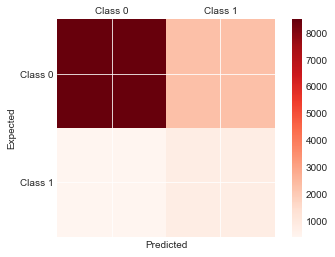

In [68]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=data_test_y, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Implementing the model
* **Here we will use the data that we got from SMOTE (higher accuracy compare to oversampling) after oversampling to remove the imbalance**
* **a) The logistic regression**

In [69]:
# call the previous libraries
logmodel = LogisticRegression()
logmodel.fit(sm_data_x,sm_data_y)        # these data after we did oversampling by SMOTE
predictions = logmodel.predict(data_test_x)

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
 [[8497 2316]
 [ 428  814]]


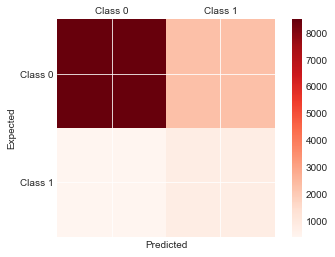

In [70]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=data_test_y, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print('classification_report is:')
print(classification_report(data_test_y,predictions))
print('confusion_matrix is:')
print(confusion_matrix(data_test_y,predictions))

classification_report is:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     10813
           1       0.26      0.66      0.37      1242

   micro avg       0.77      0.77      0.77     12055
   macro avg       0.61      0.72      0.62     12055
weighted avg       0.88      0.77      0.81     12055

confusion_matrix is:
[[8497 2316]
 [ 428  814]]


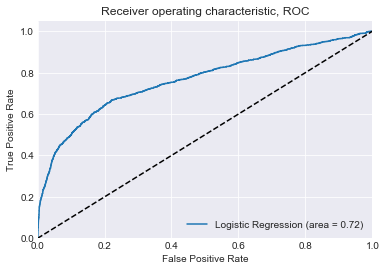

In [72]:
## Lets try ROC and see if we can find any diffrence
# Compare our results with the results that have published by Susan Li, sep,28,2017

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(data_test_y, logmodel.predict(data_test_x))
fpr, tpr, thresholds = roc_curve(data_test_y, logmodel.predict_proba(data_test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

**We can conclude that the selected metrics evaluation can lead to different results (i.e, accuracy score, classification report, and ROC).**

**b) KNearestNeighbors (KNN) classifier**

In [73]:
sm_data_x[0:10]

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome,cons_price_idx,cons_conf_idx,prime_rate
0,29.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,93.994,-36.4,4.858
1,29.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,92.893,-46.2,1.344
2,39.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,93.444,-36.1,4.963
3,43.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,6.0,1.0,93.918,-42.7,4.957
4,59.0,5.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,94.465,-41.8,4.864
5,38.0,2.0,0.0,4.0,1.0,2.0,0.0,1.0,2.0,1.0,93.994,-36.4,4.857
6,33.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,93.200,-42.0,4.076
7,33.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,93.994,-36.4,4.856
8,32.0,0.0,1.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,93.444,-36.1,4.964
9,24.0,8.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,92.963,-40.8,1.266


In [74]:
scaler = StandardScaler()
scaler.fit(sm_data_x)
scaled_x_train = scaler.fit_transform(sm_data_x)
scaled_x_test = scaler.fit_transform(data_test_x)

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [75]:
scaled_x_train.shape

(50504, 13)

In [76]:
scaled_x_test.shape

(12055, 13)

In [77]:
scaled_x_train.mean(0)

array([ 1.04865746e-14,  3.53146503e-15, -9.90996934e-15, -3.49880904e-14,
       -5.30307709e-14, -6.05628594e-15,  7.71051913e-15,  9.99870892e-14,
        3.41675640e-14,  2.97048453e-14, -1.15880440e-11, -4.11210803e-13,
       -5.72560264e-14])

In [78]:
scaled_x_test.mean(0)

array([-9.81380054e-17, -1.65036886e-17, -3.83121342e-18, -2.35766980e-18,
        2.59343678e-17,  3.30073772e-17,  8.95914524e-17,  3.50703383e-17,
       -7.54454336e-17, -3.59544644e-17, -2.26306830e-15, -5.77629101e-16,
        3.24179597e-17])

In [79]:
scaled_x_train.var(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [80]:
scaled_x_test.var(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  # K=1
## we do not need to split the data... it already splited when we used SMOTE
knn.fit(scaled_x_train,sm_data_y)

C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

**Use the predict method to predict values using your KNN model and X_test.**

In [82]:
pred = knn.predict(scaled_x_test)
print('classification_report is:')
print(classification_report(data_test_y,pred))
print('confusion_matrix is:')
print(confusion_matrix(data_test_y,pred))

classification_report is:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     10813
           1       0.22      0.34      0.27      1242

   micro avg       0.81      0.81      0.81     12055
   macro avg       0.57      0.60      0.58     12055
weighted avg       0.85      0.81      0.82     12055

confusion_matrix is:
[[9291 1522]
 [ 816  426]]


Confusion matrix:
 [[9291 1522]
 [ 816  426]]


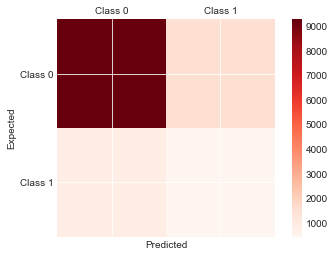

In [83]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=data_test_y, y_pred=pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Choosing a K Value
Use the elbow method to pick a good K Value!

In [84]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train,sm_data_y)
    pred_i = knn.predict(scaled_x_test)
    error_rate.append(np.mean(pred_i != data_test_y))

C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversion

C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversion

Text(0,0.5,'Error Rate')

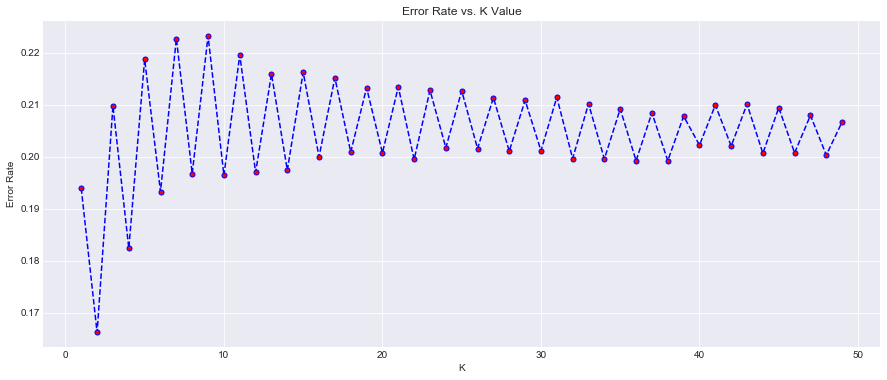

In [85]:
plt.figure(figsize=(15,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

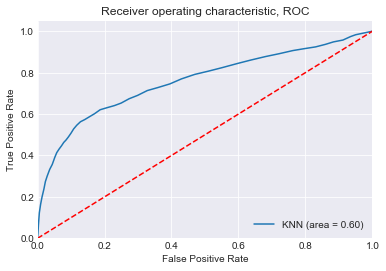

In [86]:
logit_roc_auc = roc_auc_score(data_test_y, pred)
fpr, tpr, thresholds = roc_curve(data_test_y, knn.predict_proba(scaled_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

**c) Random forest classifier**
* We know that the random forest classifier leads to best prediction compare to other Decision tree classifiers!

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [88]:
rfc.fit(sm_data_x, sm_data_y)

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [89]:
rfc_pred = rfc.predict(data_test_x)

Confusion matrix:
 [[10423   390]
 [  906   336]]


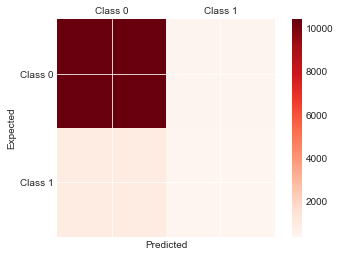

In [90]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=data_test_y, y_pred=rfc_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [91]:
print('classification_report is:')
print(classification_report(data_test_y,rfc_pred))
print('confusion_matrix is:')
print(confusion_matrix(data_test_y,rfc_pred))

classification_report is:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10813
           1       0.46      0.27      0.34      1242

   micro avg       0.89      0.89      0.89     12055
   macro avg       0.69      0.62      0.64     12055
weighted avg       0.87      0.89      0.88     12055

confusion_matrix is:
[[10423   390]
 [  906   336]]


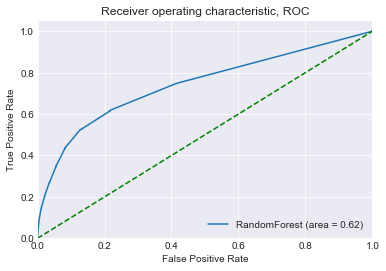

In [92]:
logit_roc_auc = roc_auc_score(data_test_y, rfc_pred)
fpr, tpr, thresholds = roc_curve(data_test_y, rfc.predict_proba(data_test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

**d) SVM Modelling**

In [93]:
from sklearn.svm import SVC
model = SVC()

In [94]:
model.fit(sm_data_x, sm_data_y)      ##X_train,y_train= sm_data_x, sm_data_y

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [95]:
pred_svm = model.predict(data_test_x)

Confusion matrix:
 [[9109 1704]
 [ 626  616]]


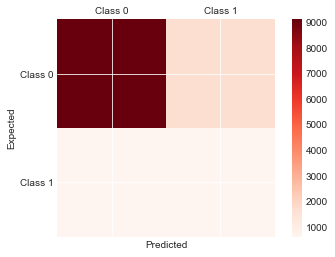

In [96]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=data_test_y, y_pred=pred_svm)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [97]:
print('classification_report is:')
print(classification_report(data_test_y,pred_svm))
print('confusion_matrix is:')
print(confusion_matrix(data_test_y,pred_svm))

classification_report is:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     10813
           1       0.27      0.50      0.35      1242

   micro avg       0.81      0.81      0.81     12055
   macro avg       0.60      0.67      0.62     12055
weighted avg       0.87      0.81      0.83     12055

confusion_matrix is:
[[9109 1704]
 [ 626  616]]


In [98]:
pred_svm

array([0, 0, 0, ..., 0, 1, 0])

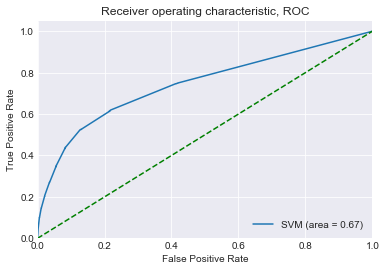

In [99]:
logit_roc_auc = roc_auc_score(data_test_y, pred_svm)
#fpr, tpr, thresholds = roc_curve(data_test_y, model.predict_proba(data_test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

**e) Neural Network using Keras**

In [100]:
scaler = StandardScaler()
scaler.fit(sm_data_x)
scaled_x_train = scaler.fit_transform(sm_data_x)
scaled_x_test = scaler.transform(data_test_x)

C:\Users\Mohanad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [101]:
from tensorflow.contrib.keras import models, layers
from tensorflow.contrib.keras import activations, optimizers, losses

## Note:
* **If you run the data marke as Data.csv, use input_dim=13** 


In [102]:
dnn = models.Sequential()
dnn.add( layers.Dense(input_dim=13, units=10, activation='relu' ))  # grid search parameters  8 is power of 2 for gpu's
dnn.add( layers.Dense(units=8, activation='relu' ))
dnn.add( layers.Dense(units=8, activation='relu' ))
dnn.add( layers.Dense(units=1, activation='sigmoid' ))

In [103]:
dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
dnn.fit(scaled_x_train, sm_data_y, epochs=300, batch_size=100, verbose=0)

In [105]:
pred_keras = dnn.predict_classes(scaled_x_test)

In [106]:
sum(data_test_y==1)

1242

Confusion matrix:
 [[9790 1023]
 [ 616  626]]


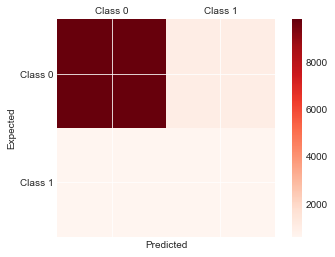

In [107]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=data_test_y, y_pred=pred_keras)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [108]:
# Evaluation
print('classification_report is:')
print(classification_report(data_test_y,pred_keras))
print('confusion_matrix is:')
print(confusion_matrix(data_test_y,pred_keras))

classification_report is:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10813
           1       0.38      0.50      0.43      1242

   micro avg       0.86      0.86      0.86     12055
   macro avg       0.66      0.70      0.68     12055
weighted avg       0.88      0.86      0.87     12055

confusion_matrix is:
[[9790 1023]
 [ 616  626]]


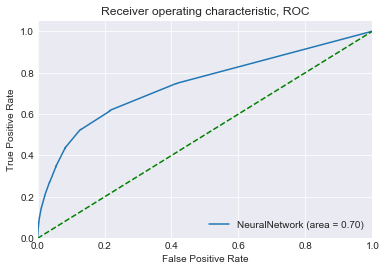

In [109]:
logit_roc_auc = roc_auc_score(data_test_y, pred_keras)
#fpr, tpr, thresholds = roc_curve(data_test_y, dnn.predict_proba(scaled_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NeuralNetwork (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

**Lets try with different activation function**
* **If you run the data marke as Data.csv, use input_dim=13** 
* **If you run the data marke as futures.csv, use input_dim=13** 

In [110]:
model = models.Sequential()
model.add(layers.Dense(10, input_dim=13, activation='tanh'))   # just one layer

model.add(layers.Dense(1, activation='sigmoid'))

In [111]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
x_train_keras = np.array(scaled_x_train)
y_train_keras = np.array(sm_data_y)
#print(x_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [113]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=200, batch_size=100, verbose=0)

In [114]:
# Evaluation
pred_keras_n = model.predict_classes(scaled_x_test)
print('classification_report is:')
print(classification_report(data_test_y,pred_keras_n))
print('confusion_matrix is:')
print(confusion_matrix(data_test_y,pred_keras_n))

classification_report is:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     10813
           1       0.33      0.58      0.42      1242

   micro avg       0.83      0.83      0.83     12055
   macro avg       0.64      0.72      0.66     12055
weighted avg       0.88      0.83      0.85     12055

confusion_matrix is:
[[9337 1476]
 [ 524  718]]


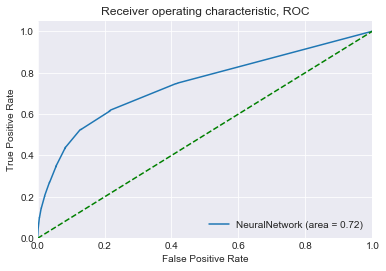

In [115]:
logit_roc_auc = roc_auc_score(data_test_y, pred_keras_n)
#fpr, tpr, thresholds = roc_curve(data_test_y, model.predict_proba(scaled_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NeuralNetwork (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

**Well, we can conclude that the rectified linear function with three layers gave us a good prediction compare to tan function**
## Note that:
**Based on the all 5 model classifiers that have been used, the Neural network using Keras has given the best prediction!**
* ** The results have varified with some academic papers (i.e., Jiong Chen, Yucen Han, Zhao Hu, Yicheng Lu and Mengni Sun, Dec-7,2014)**

## call the output
**Here the data still oversampled**

* **Create txt file, and save the output pred_keras**

In [116]:
output_y=le.inverse_transform(pred_keras)  # convert the binary number to the char..
output_y

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [117]:
pred_keras

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [118]:
np.savetxt('futures_output_num.out', pred_keras, fmt='%0.1f')

In [119]:
with open('futures_output.out','w') as f:
    for s in output_y:
        f.write(str(s)+'\n')
print(output_y)

['no' 'no' 'no' ... 'no' 'yes' 'no']


In [120]:
output_y

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [121]:
output_y=pd.DataFrame(output_y)
print('The "yes" value is')
print((output_y[0]=='yes').sum())
print('The "no" value is')
print((output_y[0]=='no').sum())

The "yes" value is
1649
The "no" value is
10406


In [122]:
len(output_y)

12055

## Predict the futures with Neural network by Keras

* **Since we do not have confidence about our oversampling data(We do not know exactly which features dublicated to increse the number of samples. We used two type of data (feeding) in out predictions**


* **1) The oversampled data (sm_data_x and sm_data_y) throgh SMOTE**
* **2) Our original data  before resampling (Data.cvs) with (data_train_x and data_train_y)**

In [123]:
X_new=  pd.read_csv("futures.csv")
X_new.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate
0,42,blue-collar,married,basic.9y,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857
1,41,management,married,basic.6y,no,no,no,telephone,mon,2,999,nonexistent,93.994,-36.4,4.857
2,34,technician,married,high.school,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857
3,54,retired,married,high.school,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857
4,48,blue-collar,married,basic.4y,no,yes,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857


In [124]:
X_new.replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic', inplace=True)

In [125]:
le = preprocessing.LabelEncoder()
X_new.job = le.fit_transform(X_new.job)
X_new.marital = le.fit_transform(X_new.marital)
X_new.education = le.fit_transform(X_new.education)
X_new.default = le.fit_transform(X_new.default)
X_new.housing = le.fit_transform(X_new.housing)
X_new.loan = le.fit_transform(X_new.loan)
X_new.contact = le.fit_transform(X_new.contact)
X_new.poutcome = le.fit_transform(X_new.poutcome)
X_new.day_of_week = le.fit_transform(X_new.day_of_week)

In [126]:
X_new.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate
0,42,1,1,0,1,0,0,1,1,1,999,1,93.994,-36.4,4.857
1,41,4,1,0,0,0,0,1,1,2,999,1,93.994,-36.4,4.857
2,34,9,1,1,0,0,0,1,1,1,999,1,93.994,-36.4,4.857
3,54,5,1,1,1,0,0,1,1,1,999,1,93.994,-36.4,4.857
4,48,1,1,0,0,2,0,1,1,1,999,1,93.994,-36.4,4.857


In [127]:
X_new.drop(['day_of_week','pdays'], axis=1, inplace=True)

In [128]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 13 columns):
age               1007 non-null int64
job               1007 non-null int32
marital           1007 non-null int32
education         1007 non-null int32
default           1007 non-null int32
housing           1007 non-null int32
loan              1007 non-null int32
contact           1007 non-null int32
campaign          1007 non-null int64
poutcome          1007 non-null int32
cons_price_idx    1007 non-null float64
cons_conf_idx     1007 non-null float64
prime_rate        1007 non-null float64
dtypes: float64(3), int32(8), int64(2)
memory usage: 70.9 KB


**1) The oversampled data (sm_data_x and sm_data_y) throgh SMOTE**

In [129]:
dnn.fit(scaled_x_train, sm_data_y, epochs=300, batch_size=100, verbose=0)

In [130]:
scaler.fit(X_new)
scaled_x_new = scaler.fit_transform(X_new)

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [131]:
y_pred_future=dnn.predict_classes(scaled_x_new)
y_pred_future

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [132]:
np.savetxt('y_pred_future_oversampled.out', y_pred_future, fmt='%0.1f')

In [133]:
output_future_req = list(y_pred_future)
output_future_reqn = ['yes' if i == 1 else 'no' for i in output_future_req]

In [134]:
with open('output_future_oversampled.out','w') as f:
    for s in output_future_reqn:
        f.write(str(s)+'\n')

In [135]:
output_future_reqn=pd.DataFrame(output_future_reqn)
print('The "yes" value is')
print((output_future_reqn[0]=='yes').sum())
print('The "no" value is')
print((output_future_reqn[0]=='no').sum())

The "yes" value is
680
The "no" value is
327


**2) Our original data  before resampling (Data.cvs) with (data_train_x and data_train_y)** 

In [136]:
scaler.fit(data_train_x)
scaled_x_train = scaler.fit_transform(data_train_x)

C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mohanad\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [137]:
dnn.fit(scaled_x_train, data_train_y, epochs=300, batch_size=100, verbose=0)

In [138]:
y_pred_future=dnn.predict_classes(scaled_x_new)
y_pred_future

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [139]:
np.savetxt('y_pred_future_original.out', y_pred_future, fmt='%0.1f')

In [140]:
output_future_req_original = list(y_pred_future)
output_future_req_originaln = ['yes' if i == 1 else 'no' for i in output_future_req_original]

In [141]:
with open('output_future_original.out','w') as f:
    for s in output_future_req_originaln:
        f.write(str(s)+'\n')

In [142]:
output_future_req_originaln=pd.DataFrame(output_future_req_originaln)
print('The "yes" value is')
print((output_future_req_originaln[0]=='yes').sum())
print('The "no" value is')
print((output_future_req_originaln[0]=='no').sum())

The "yes" value is
269
The "no" value is
738


In [143]:
X_new['y']=output_future_req_originaln

In [144]:
X_new.head()

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,42,1,1,0,1,0,0,1,1,1,93.994,-36.4,4.857,no
1,41,4,1,0,0,0,0,1,2,1,93.994,-36.4,4.857,no
2,34,9,1,1,0,0,0,1,1,1,93.994,-36.4,4.857,no
3,54,5,1,1,1,0,0,1,1,1,93.994,-36.4,4.857,no
4,48,1,1,0,0,2,0,1,1,1,93.994,-36.4,4.857,no


In [145]:
X_new.to_csv('future_pred.csv')